# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Gathering Data

Sumber dataset : https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

# Assessing Data

In [2]:
day = pd.read_csv("./data/day.csv")
hour = pd.read_csv("./data/hour.csv")

In [3]:
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check Data Inconsistency

In [5]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terjadi missing values

In [7]:
day.duplicated().sum()

0

In [8]:
hour.duplicated().sum()


0

Tidak terjadi duplicate data

# Cleaning Data

Cleaning data tidak perlu dilakukan untuk saat ini dengan pertimbangan outlier yang berkemungkinan perlu ditanggapi berdasarkan eksplorasi data nantinya

# Eksplorasi Data

## Membuat Pertanyaan

1. Apakah terdapat perbedaan pola peminjaman sepeda antara musim (season) yang berbeda?
2. Bagaimana distribusi peminjaman sepeda berdasarkan jam dalam sehari untuk setiap musim?

## Menjawab Pertanyaan dengan Visualisasi Data

### 1. Apakah terdapat perbedaan pola peminjaman sepeda antara musim (season) yang berbeda?

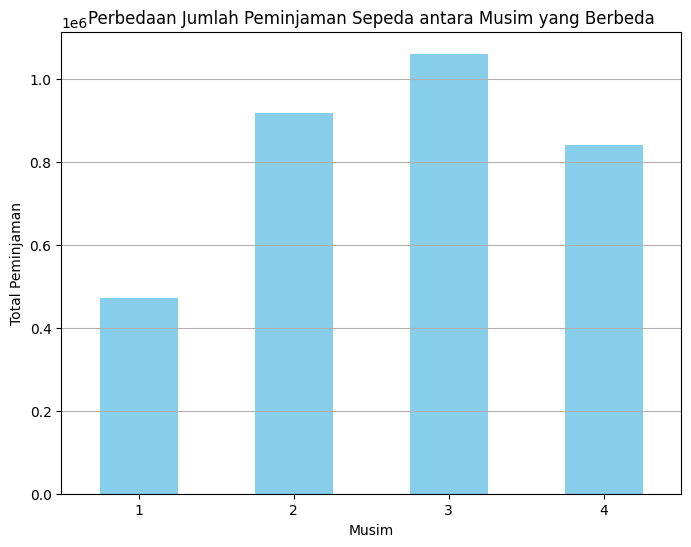

In [9]:
# Plot perbedaan jumlah peminjaman sepeda antara musim (season) yang berbeda
plt.figure(figsize=(8, 6))
day.groupby('season')['cnt'].sum().plot(kind='bar', color='skyblue')
plt.title('Perbedaan Jumlah Peminjaman Sepeda antara Musim yang Berbeda')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Musim pertama merupakan musim dengan total peminjaman terendah, sedangkan musim ketiga merupakan musim dengan total peminjaman tertinggi.

### 2. Bagaimana distribusi peminjaman sepeda berdasarkan jam dalam sehari untuk setiap musim?

#### Melihat pola peminjaman sepeda per jam dalam sehari

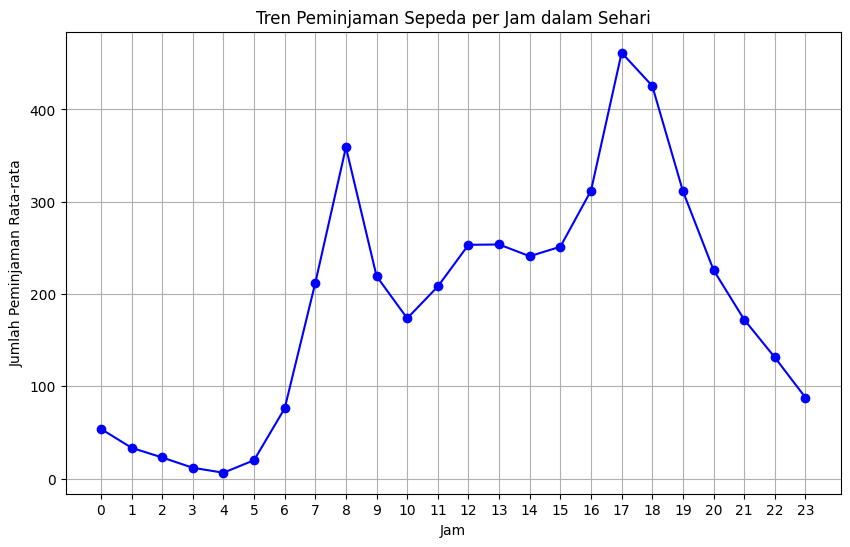

In [10]:
# Plot tren peminjaman sepeda per jam dalam sehari
plt.figure(figsize=(10, 6))
hour.groupby(hour['hr'])['cnt'].mean().plot(marker='o', color='blue')
plt.title('Tren Peminjaman Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

#### Melihat pola peminjaman sepeda per jam dalam sehari berdasarkan jenis hari (hari kerja atau hari libur)

Hari kerja : Hari 1-5 <br>
Hari libur : Hari 6 dan 7

<Figure size 1000x600 with 0 Axes>

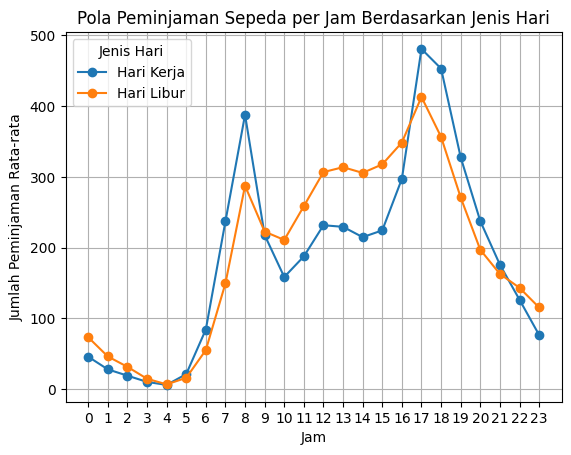

In [11]:
# Tambahkan kolom 'day_type' untuk menandai apakah hari tersebut merupakan hari kerja atau hari libur
hour['day_type'] = np.where(hour['weekday'] < 5, 'Hari Kerja', 'Hari Libur')

# Plot pola peminjaman sepeda per jam berdasarkan jenis hari
plt.figure(figsize=(10, 6))
hour.groupby(['hr', 'day_type'])['cnt'].mean().unstack().plot(marker='o')
plt.title('Pola Peminjaman Sepeda per Jam Berdasarkan Jenis Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Jenis Hari', loc='upper left')
plt.show()


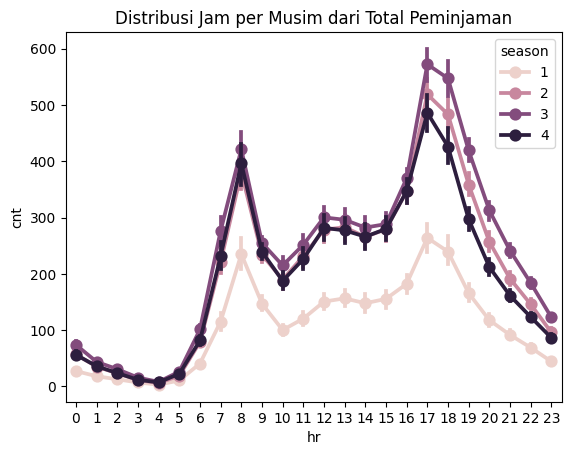

In [18]:
# Membuat subplot
fig, ax = plt.subplots()

# Menggunakan seaborn untuk membuat point plot
sns.pointplot(data=hour[['hr', 'cnt', 'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)

# Mengatur judul plot
ax.set(title="Distribusi Jam per Musim dari Total Peminjaman")

# Menampilkan plot
plt.show()

In [19]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Hari Libur
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Hari Libur
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Hari Libur
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Hari Libur
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Hari Libur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Hari Kerja
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Hari Kerja
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Hari Kerja
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Hari Kerja


Dari visualisasi ini terlihat bahwa musim 1 (pertengahan desember - pertengahan maret) selalu terjadi underdemand karena musim itu merupakan musim dingin di negara-negara subtropis, terutama di belahan bumi bagian utara.

# Kesimpulan

1. Apakah terdapat perbedaan pola peminjaman sepeda antara musim (season) yang berbeda? <br>
    Musim pertama merupakan musim dengan total peminjaman terendah, sedangkan musim ketiga merupakan musim dengan total peminjaman tertinggi.
    
2. Bagaimana distribusi peminjaman sepeda berdasarkan jam dalam sehari untuk setiap musim? <br>
    Dari visualisasi ini terlihat bahwa musim 1 (pertengahan desember - pertengahan maret) selalu terjadi underdemand karena musim itu merupakan musim dingin di negara-negara subtropis, terutama di belahan bumi bagian utara.